In [ ]:
# Playing Cards Classification with fastai

This notebook documents the full pipeline for training and evaluating
a deep learning model that classifies playing cards (53 classes)
using the fastai library and a modular project structure.

In [ ]:
## 1. Problem Definition

We tackle a multi-class image classification problem:

> Given an image of a single playing card from a standard deck,
> predict which exact card it is.

- Number of classes: **53** (52 cards + 1 extra card, depending on the dataset).
- Input: RGB image of size 224×224 containing a single card.
- Output: one of the 53 class labels (e.g., `ace_of_spades`, `10_of_diamonds`, etc.).

We assume that:
- Every input image contains exactly one playing card.
- We do not perform card *detection* (card vs no-card), only *classification*.

In [ ]:
## 2. Dataset Description

We use the **"Cards Image Dataset – Classification"**.

Key properties:
- 7,624 training images
- 265 validation images
- 265 test images
- 53 classes (one folder per card type)
- All images: 224 × 224 × 3, RGB, `.jpg` format
- Each image contains a single playing card cropped tightly (over 50% of pixels)

The dataset is organized as:
data/cards
       /test
       /train
       /valid

This structure is ideal for fastai's `ImageDataLoaders.from_folder`.


In [1]:
from pathlib import Path
import sys

DATA_DIR = Path("data/cards")
if not DATA_DIR.exists() or not any(DATA_DIR.iterdir()):
    sys.path.append("src")
    from download_data import download_and_reset_data
    download_and_reset_data()


In [2]:
from src.config import DataConfig, TrainConfig
from src.data_module import CardDataModule
from src.model_factory import create_learner
from src.trainer import Trainer
from src.evaluator import Evaluator

data_cfg = DataConfig()
train_cfg = TrainConfig()

data_cfg, train_cfg

(DataConfig(base_path=Path('data/cards'), test_dir='test', train_dir='train', valid_dir='valid', img_size=224, batch_size=32, seed=42),
 TrainConfig(backbone='resnet18', epochs=12, lr=0.003, freeze_epochs=1, model_name='card_classifier'))

Verifying dataset integrity...
Found 0 corrupted images (checked 800 files).
Corrupted images removed: 0


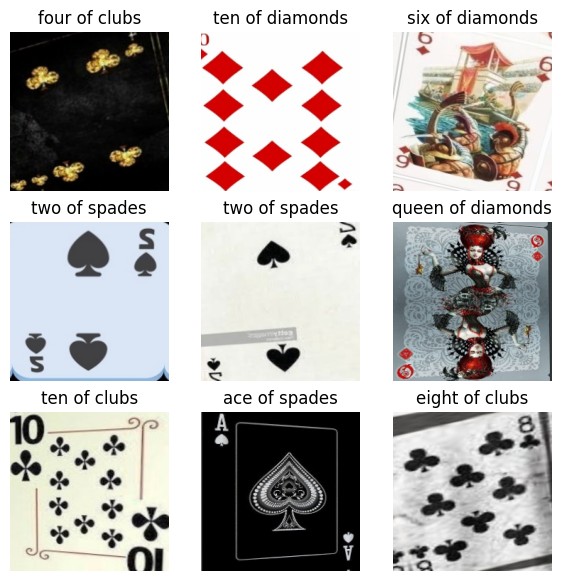

In [3]:
dm = CardDataModule(data_cfg)

failed = dm.verify()
print(f"Corrupted images removed: {len(failed)}")

dls = dm.get_dls()

dls.show_batch(max_n=9, figsize=(7,7))

In [4]:
learn = create_learner(dls, train_cfg)
learn

In [4]:
trainer = Trainer(learn, train_cfg)
trainer.train()

epoch,train_loss,valid_loss,accuracy,time
0,3.229024,2.302575,0.335849,01:06


epoch,train_loss,valid_loss,accuracy,time
0,2.144770,1.385968,0.577358,01:33
1,1.581469,0.937336,0.713208,01:36
2,1.167055,0.676442,0.792453,01:45
3,0.898694,0.551765,0.811321,01:41
4,0.718460,0.475718,0.845283,01:39
5,0.504965,0.284149,0.901887,01:40
6,0.427483,0.256776,0.916981,01:39
7,0.306744,0.195950,0.935849,01:38
8,0.241204,0.196031,0.920755,01:39
9,0.169012,0.216116,0.928302,01:49


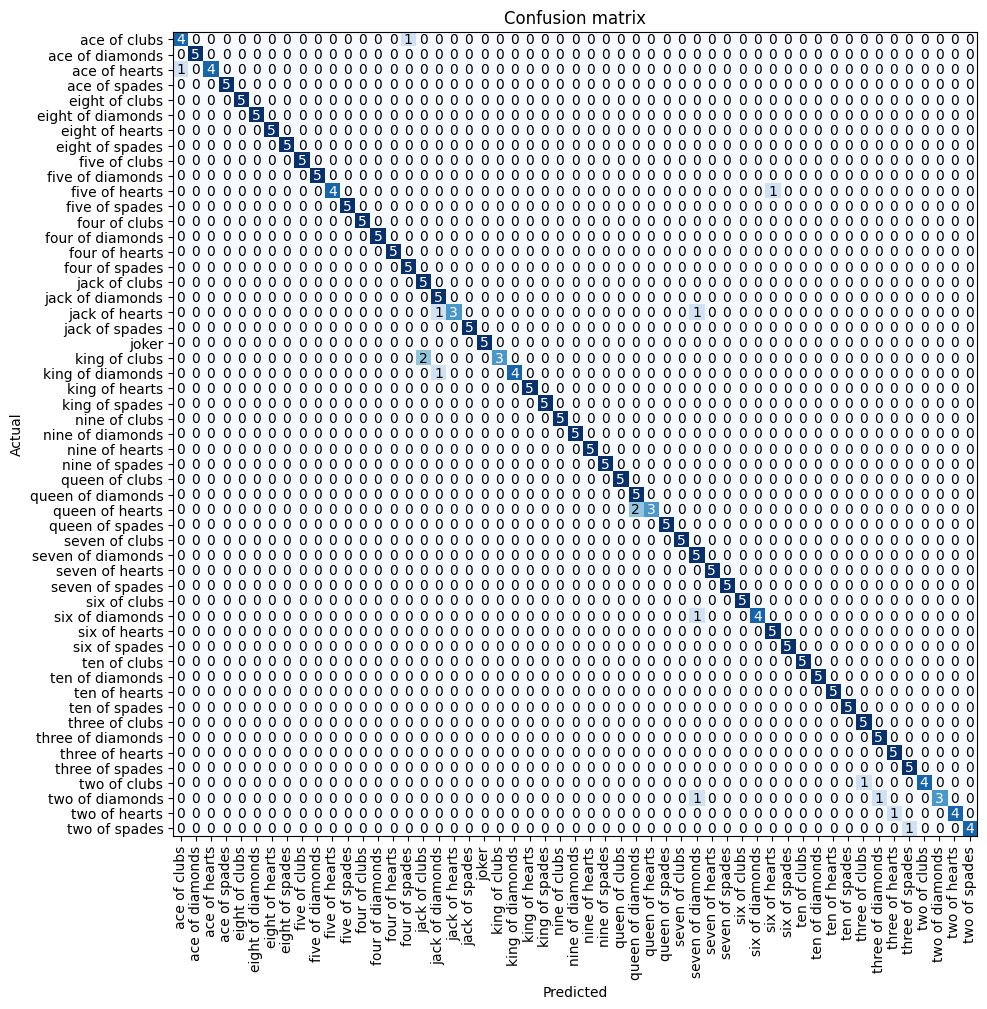

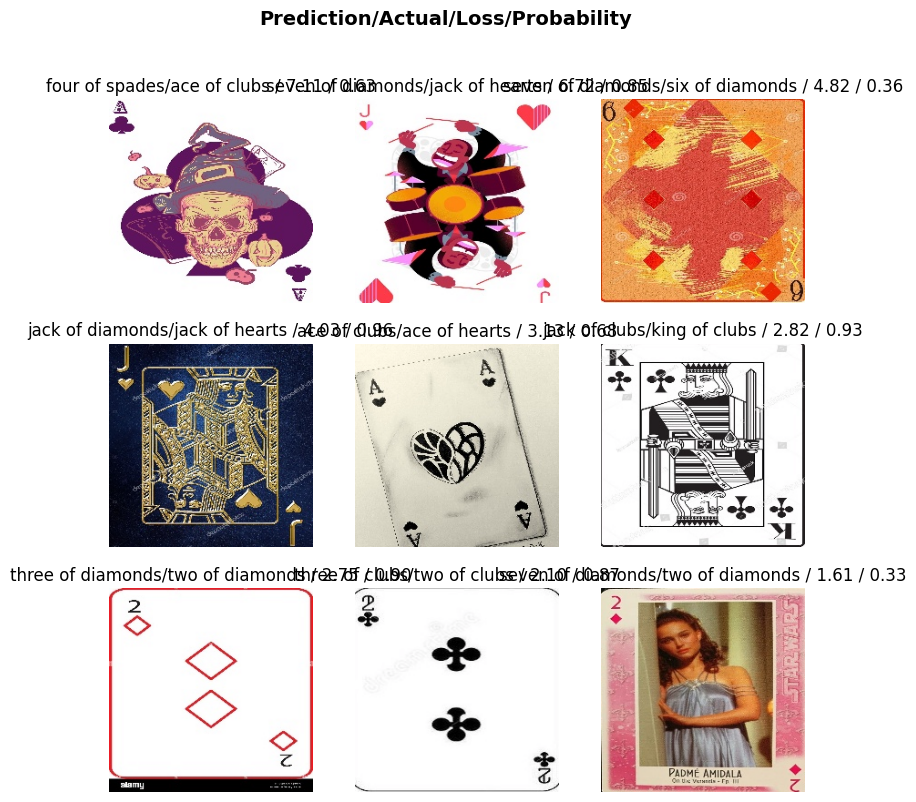

In [5]:
evaluator = Evaluator(learn)
evaluator.plot_confusion()
evaluator.plot_top_losses(n=9, nrows=3)

In [6]:
test_acc = evaluator.test_accuracy(data_cfg.test_path())
test_acc

Test Accuracy: 0.9170


0.9169811606407166